In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# visualization
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
sns.set_style("whitegrid")
import plotly.express as px

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 500)
pd.set_option('display.float_format', lambda x: '%.2f' % x)


/kaggle/input/creditcardfraud/creditcard.csv


In [3]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [4]:
path = '/kaggle/input/creditcardfraud/creditcard.csv'
df = pd.read_csv(path)
df.sample(10)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
176788,122912.00,1.87,0.57,-1.09,3.51,0.81,-0.03,0.47,-0.10,-1.52,...,-0.11,-0.50,0.19,-0.57,-0.13,-0.24,-0.07,-0.06,42.06,0
84914,60517.00,0.49,1.82,-2.50,1.42,1.04,-1.15,0.43,0.39,-0.61,...,-0.12,-0.28,0.03,-0.86,-0.38,-0.36,0.12,-0.07,0.75,0
191226,129169.00,2.13,0.24,-2.12,0.27,0.77,-0.82,0.29,-0.35,0.54,...,0.14,0.64,-0.15,-1.11,0.41,-0.04,0.01,-0.04,1.34,0
131985,79813.00,1.34,-0.62,-0.30,-0.99,-0.29,-0.14,-0.34,-0.14,-1.23,...,0.24,0.49,-0.34,-0.77,0.77,-0.07,-0.02,0.00,77.70,0
16320,27704.00,-0.47,0.64,1.64,0.56,-0.17,-0.62,0.50,0.06,-0.79,...,-0.02,-0.25,0.05,0.51,-0.43,0.25,0.06,0.12,34.93,0
79081,57853.00,-0.10,0.78,0.79,0.84,-0.19,-0.14,0.47,-0.09,-0.56,...,-0.02,-0.03,0.32,-0.00,-1.59,0.09,0.03,0.22,49.99,0
269214,163591.00,-5.52,1.90,-0.30,5.03,-2.32,1.74,-2.43,2.69,-1.12,...,0.04,0.14,0.40,0.65,0.18,0.29,-2.39,-0.17,42.61,0
3368,2912.00,1.36,-0.19,-0.52,-1.25,-0.04,-0.52,-0.05,-0.03,1.08,...,0.00,0.05,-0.28,-0.85,0.88,-0.54,0.03,-0.01,1.00,0
177003,123002.00,1.88,0.19,-0.31,3.86,0.12,0.70,-0.36,0.25,-0.32,...,0.10,0.49,0.03,-0.43,0.09,0.14,-0.01,-0.06,0.00,0
162484,115155.00,-0.58,1.23,-0.52,-1.02,0.80,-0.38,0.79,0.05,0.79,...,-0.42,-0.95,0.06,-0.03,-0.26,0.17,0.54,0.29,0.89,0


In [5]:
df.shape

(284807, 31)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,284807.00,94813.86,47488.15,0.00,54201.50,84692.00,139320.50,172792.00
V1,284807.00,0.00,1.96,-56.41,-0.92,0.02,1.32,2.45
V2,284807.00,0.00,1.65,-72.72,-0.60,0.07,0.80,22.06
V3,284807.00,-0.00,1.52,-48.33,-0.89,0.18,1.03,9.38
V4,284807.00,0.00,1.42,-5.68,-0.85,-0.02,0.74,16.88
V5,284807.00,0.00,1.38,-113.74,-0.69,-0.05,0.61,34.80
V6,284807.00,0.00,1.33,-26.16,-0.77,-0.27,0.40,73.30
V7,284807.00,-0.00,1.24,-43.56,-0.55,0.04,0.57,120.59
V8,284807.00,0.00,1.19,-73.22,-0.21,0.02,0.33,20.01
V9,284807.00,-0.00,1.10,-13.43,-0.64,-0.05,0.60,15.59


In [8]:
df.isnull().sum().sum()

0

In [9]:
df.duplicated().sum()

1081

In [10]:
def missing(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

missing(df)

,Missing_Number,Missing_Percent
Time,0,0.00
V16,0,0.00
Amount,0,0.00
V28,0,0.00
V27,0,0.00
V26,0,0.00
V25,0,0.00
V24,0,0.00
V23,0,0.00
V22,0,0.00


In [11]:
TARGET = 'Class'

In [12]:
df[TARGET].value_counts()

0    284315
1       492
Name: Class, dtype: int64

(-1.25, 1.25, -1.25, 1.25)

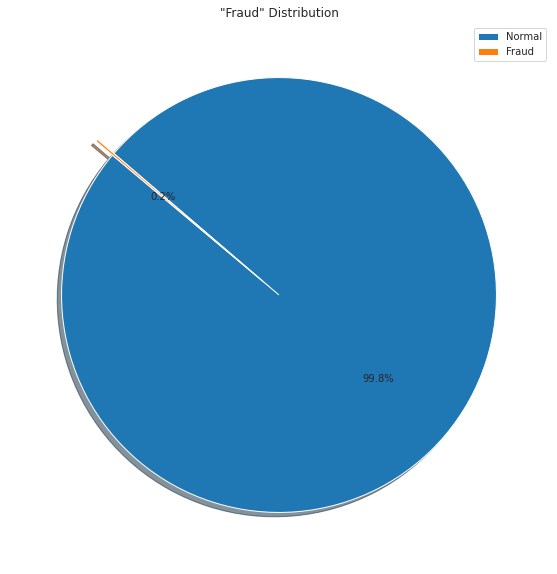

In [13]:
# df[TARGET].value_counts().plot(kind='pie', figsize=(10,10), autopct='%1.1f%%')

plt.figure(figsize=(10,10))
explode = [0, 0.1]
plt.pie(df[TARGET].value_counts(), explode=explode, autopct='%1.1f%%', shadow=True,startangle=140)
plt.legend(labels=['Normal','Fraud'])
plt.title('"Fraud" Distribution')
plt.axis('off')

In [14]:
df.groupby(TARGET).mean()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Class,,,,,,,,,,,,,,,,,,,,,
0,94838.20,0.01,-0.01,0.01,-0.01,0.01,0.00,0.01,-0.00,0.00,...,-0.00,-0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,88.29
1,80746.81,-4.77,3.62,-7.03,4.54,-3.15,-1.40,-5.57,0.57,-2.58,...,0.37,0.71,0.01,-0.04,-0.11,0.04,0.05,0.17,0.08,122.21


In [15]:
def heading(title, length=10):
    print('-'*length, title, '-'*length)
    
heading('Time Analysis')
heading('Fraud', 5)
print (df.Time[df[TARGET] == 1].describe())
print()
heading("Normal", 5)
print (df.Time[df[TARGET] == 0].describe())

---------- Time Analysis ----------
----- Fraud -----
count      492.00
mean     80746.81
std      47835.37
min        406.00
25%      41241.50
50%      75568.50
75%     128483.00
max     170348.00
Name: Time, dtype: float64

----- Normal -----
count   284315.00
mean     94838.20
std      47484.02
min          0.00
25%      54230.00
50%      84711.00
75%     139333.00
max     172792.00
Name: Time, dtype: float64


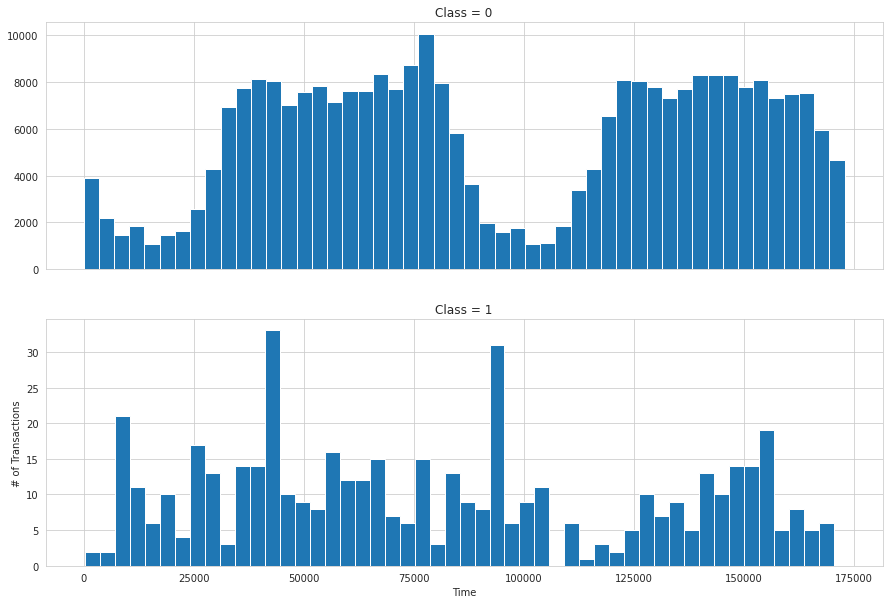

In [16]:
def histogram(df, feature, target=TARGET, bins=50):
    vals = df[target].value_counts().index
    f, (fig1, fig2) = plt.subplots(2,1, sharex=True, figsize=(15, 10))

#     plt.yscale('log')
    fig1.hist(df[feature][df[target]==vals[0]], bins=bins)
    fig1.set_title(target + ' = ' + str(vals[0]))

    fig2.hist(df[feature][df[target]==vals[1]], bins=bins)
    fig2.set_title(target + ' = ' + str(vals[1]))

    plt.xlabel(feature)
    plt.ylabel('# of Transactions')
   

    plt.show()
    
histogram(df, 'Time', TARGET)

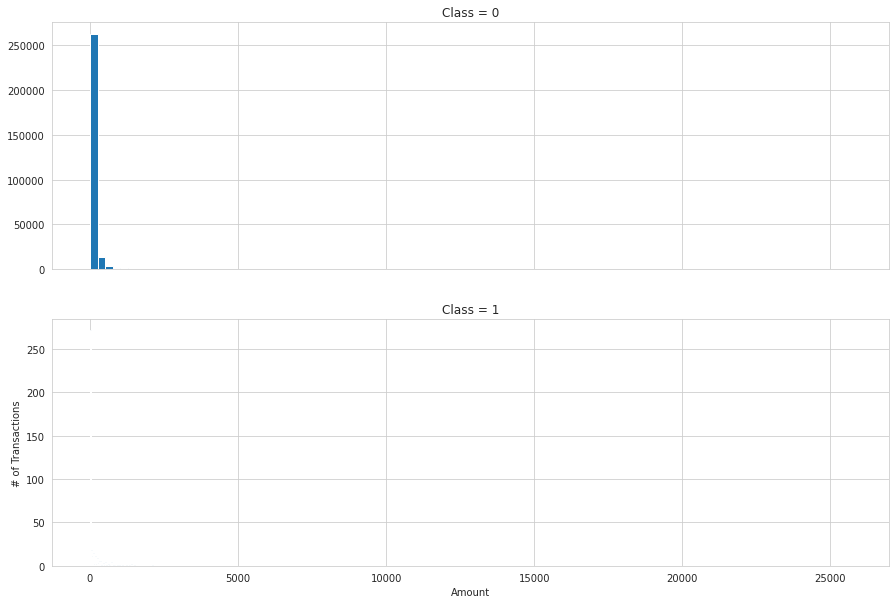

In [17]:
histogram(df, 'Amount', TARGET, bins=100)

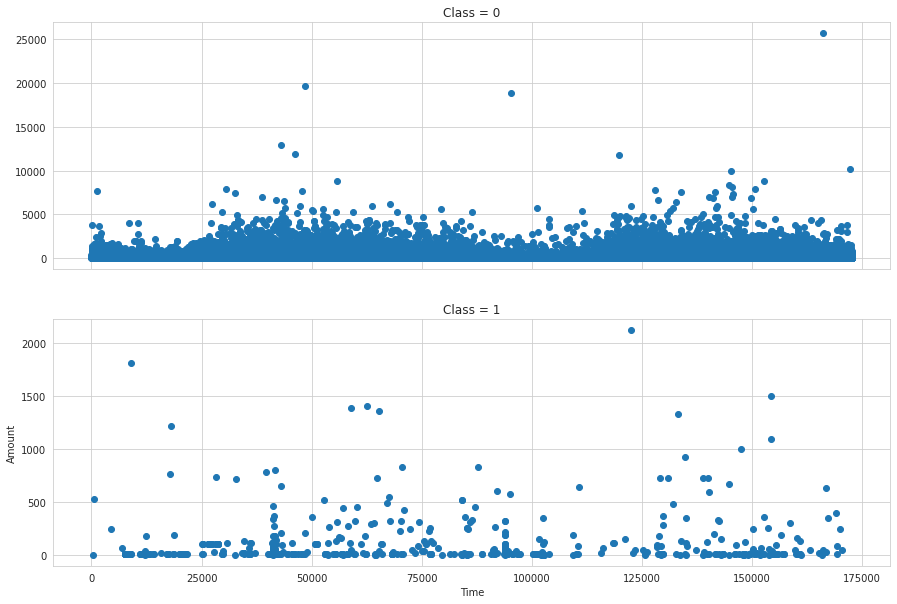

In [18]:
def scatter(df, feature1, feature2, target=TARGET):
    vals = df[target].value_counts().index
    f, (fig1, fig2) = plt.subplots(2,1, sharex=True, figsize=(15, 10))

#     plt.yscale('log')
    fig1.scatter(df[feature1][df[target]==vals[0]], df[feature2][df[target]==vals[0]])
    fig1.set_title(target + ' = ' + str(vals[0]))

    fig2.scatter(df[feature1][df[target]==vals[1]], df[feature2][df[target]==vals[1]])
    fig2.set_title(target + ' = ' + str(vals[1]))

    plt.xlabel(feature1)
    plt.ylabel(feature2)
   

    plt.show()

scatter(df, 'Time', 'Amount')  

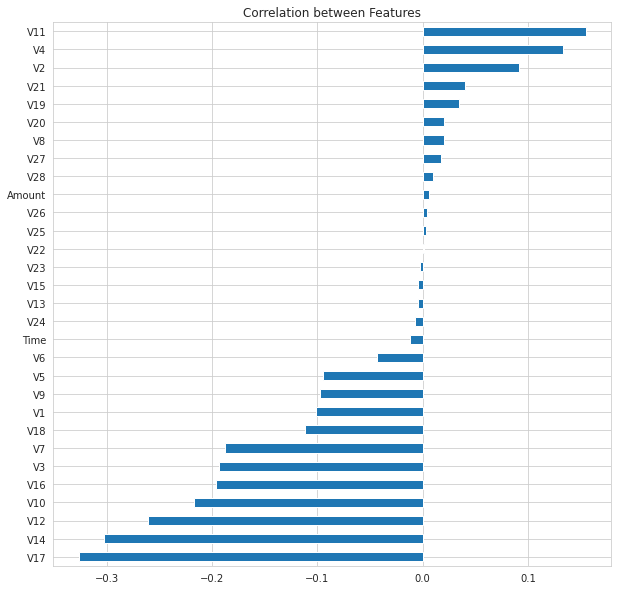

In [19]:
def corr_features(df, target=TARGET, size=10):
    plt.figure(figsize=(size,size))
    corr = df.corr()[target].sort_values().drop(target)
    corr.plot(kind='barh')
    plt.title('Correlation between Features')
    plt.grid(True)
    plt.show()
    
corr_features(df)


V10, V12, V14, and V17 seem to be most correlated features.

In [20]:
# sns.boxplot(df, x='Class', y=df.Amount)

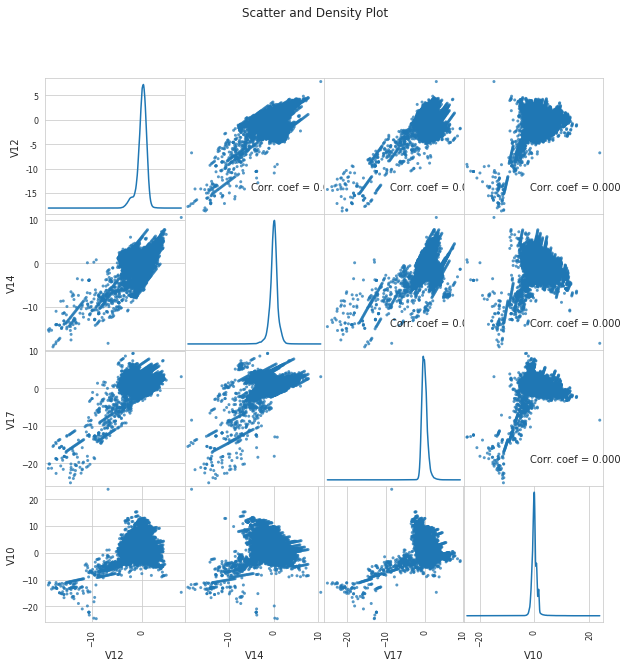

In [21]:
def scatter(df, plotSize=10, columns=df.columns, textSize=10):
    df = df[columns]
#     df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()
    
scatter(df,columns=['V12', 'V14', 'V17', 'V10'])

# Data Cleaning

## Missing Values

In [22]:
missing(df)['Missing_Number'].sum()

0

## Duplicated Values

In [23]:
df[df[TARGET]==0].duplicated().sum()

1062

In [24]:
# df.drop_duplicates(inplace=True)

## Outliers

[Detecting outliers using quantile ranges](http://https://community.jmp.com/t5/JMP-Blog/Outliers-Episode-2-Detecting-outliers-using-quantile-ranges/ba-p/341727)

In [25]:
def outlier_report(df, cols=df.columns, whisker=3):
    res = {}
    for col in cols:
        iqr = np.quantile(df[col],[.25,.75])[1] - np.quantile(df[col],[.25,.75])[0]
        lower_limit = np.quantile(df[col],[.25,.75])[0]- iqr*whisker 
        upper_limit = np.quantile(df[col],[.25,.75])[1]+iqr*whisker
        num = len([c for c in df[col].to_list() if (c<lower_limit or c>upper_limit)])
        if num > 0:
            res[col]={"lower_limit":lower_limit, "upper_limit":upper_limit, "iqr": iqr, "# of outliers":num}
    return pd.DataFrame(res).T

outlier_report(df)

,lower_limit,upper_limit,iqr,# of outliers
V1,-7.63,8.02,2.24,1994.00
V2,-4.81,5.01,1.40,4453.00
V3,-6.64,6.78,1.92,762.00
V4,-5.62,5.52,1.59,479.00
V5,-4.60,4.52,1.30,2321.00
V6,-4.27,3.90,1.17,5389.00
V7,-3.93,3.94,1.12,3051.00
V8,-1.82,1.94,0.54,11285.00
V9,-4.36,4.32,1.24,1077.00
V10,-3.50,3.42,0.99,3208.00


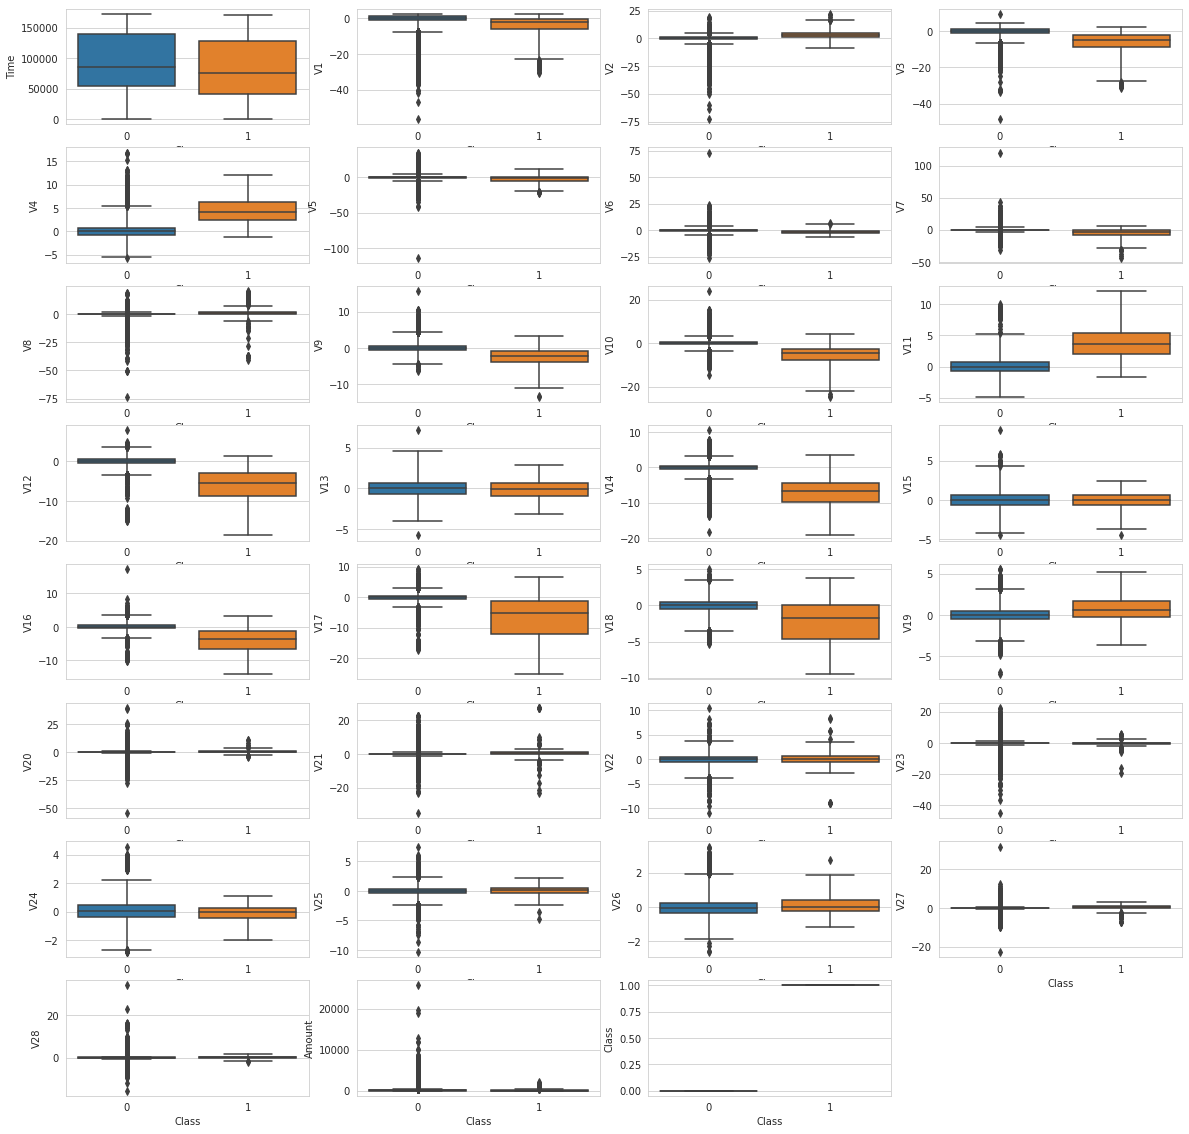

In [26]:
def boxplot_all(df, target):
    index = 0
    plt.figure(figsize=(20,20))
    for feature in df.columns:
        index += 1
        plt.subplot(8,4,index)
        sns.boxplot(y = feature, x = target, data = df, whis=3)

boxplot_all(df, TARGET)

Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)

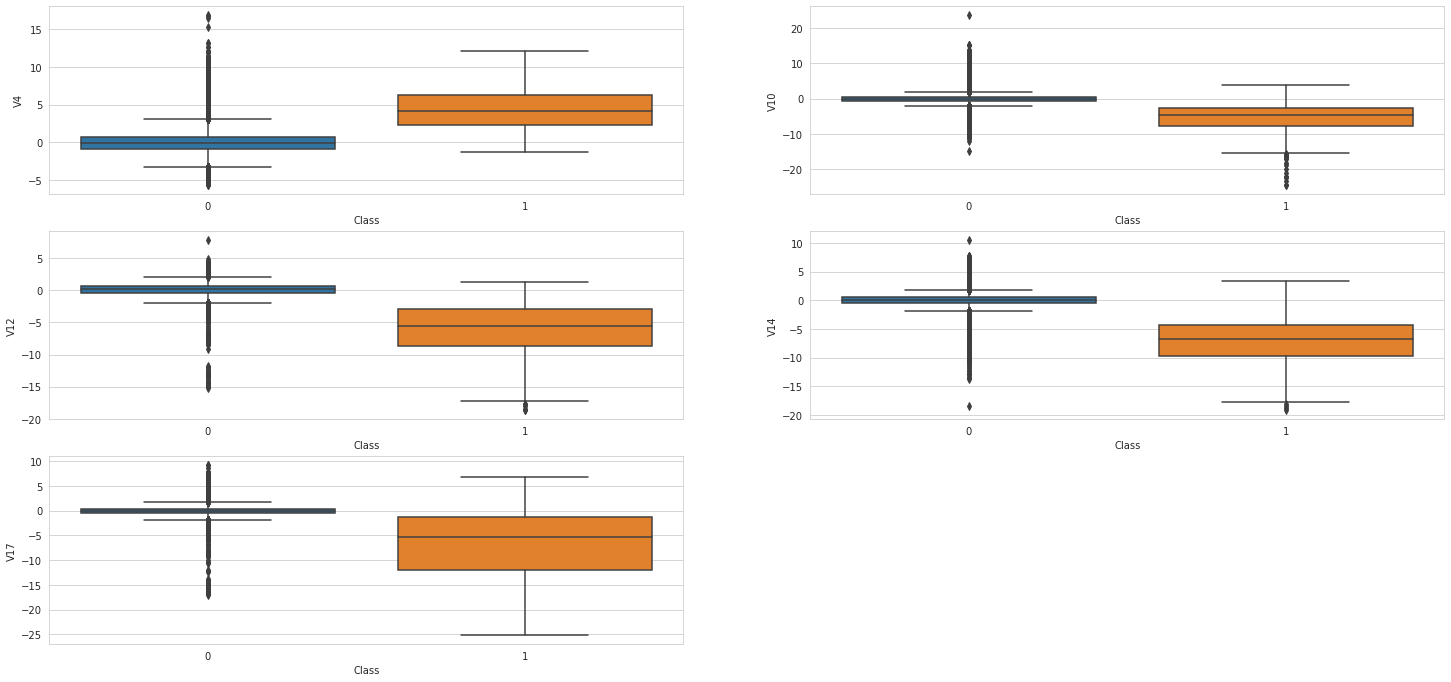

In [27]:
def boxplot(df, target, cols=df.columns):
    n = len(cols)
    f, axes = plt.subplots(ncols=n, figsize=(n*5,n*4))
    index = 1
    for col in cols:
        plt.subplot(n,2,index)
        sns.boxplot(x=target, y=col, data=df)
#         axes[index].set_title(f'{col} vs Class (Negative Correlation)')
        index += 1
    plt.show()
    

boxplot(df, TARGET, cols=['V4', 'V10', 'V12', 'V14', 'V17'])

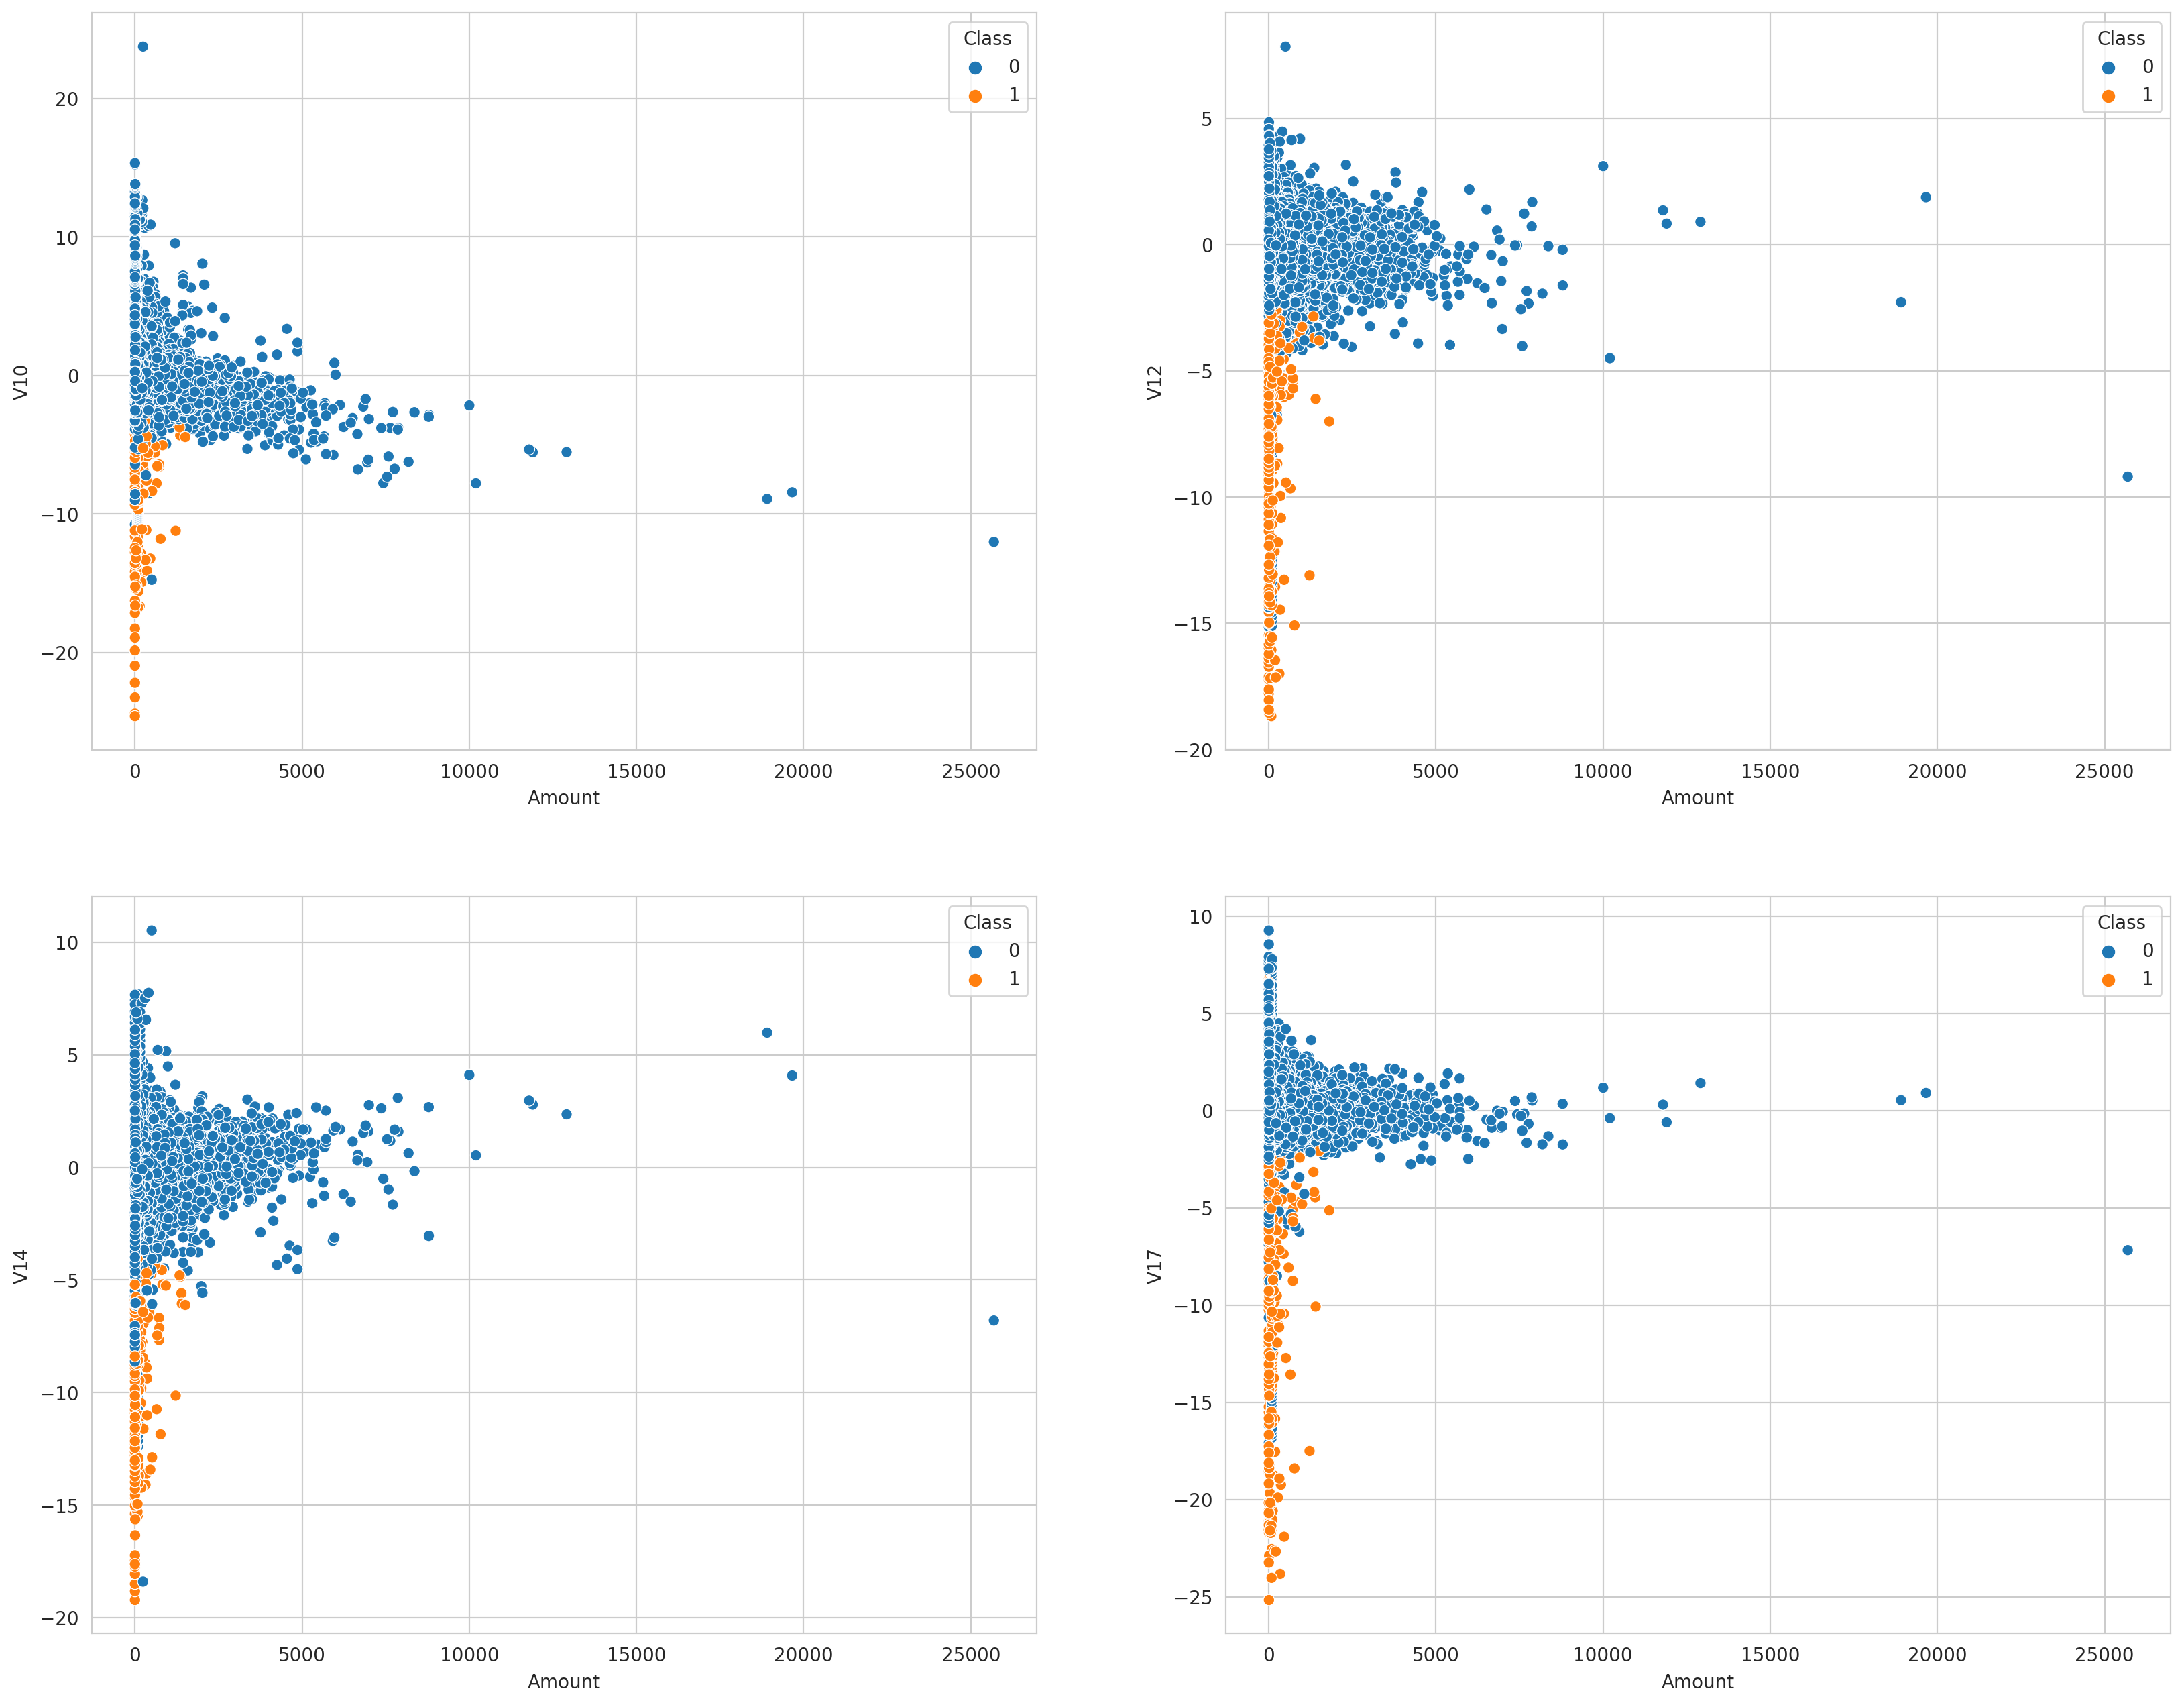

In [28]:
def scatterplot(df, target, x, cols=df.columns):
    import math
    n = len(cols)
#     f, ax = plt.subplots(2,2, figsize=(20,12), dpi=200, sharey=True)
    f, ax = plt.subplots(ncols=n, figsize=(n*5,n*4), dpi=200)

    index = 1
    for col in cols:
        plt.subplot(math.ceil(n/2),2,index)
        sns.scatterplot(data = df, x = x, y = col, hue = target,  palette='tab10')
        index += 1
    plt.show()
    
    
scatterplot(df, TARGET, x ='Amount', cols=['V10', 'V12', 'V14', 'V17'])

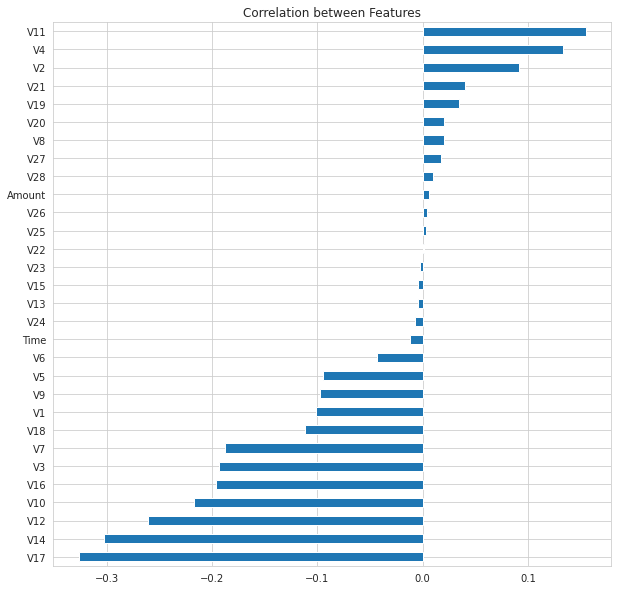

In [29]:
corr_features(df)

<AxesSubplot:>

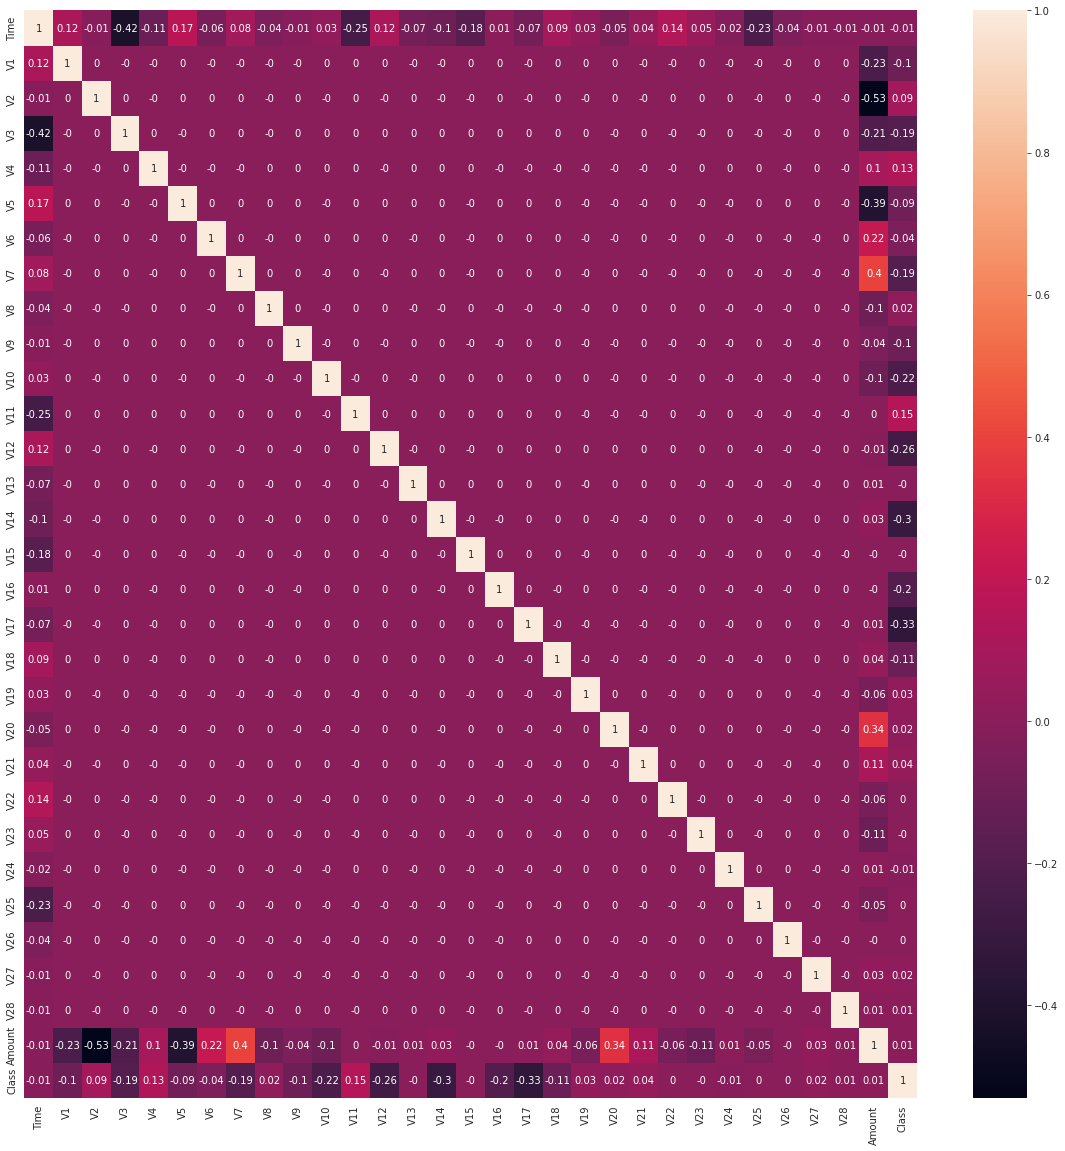

In [30]:
plt.figure(figsize=(20,20)) 
sns.heatmap(df.corr().round(2), annot=True)

<AxesSubplot:>

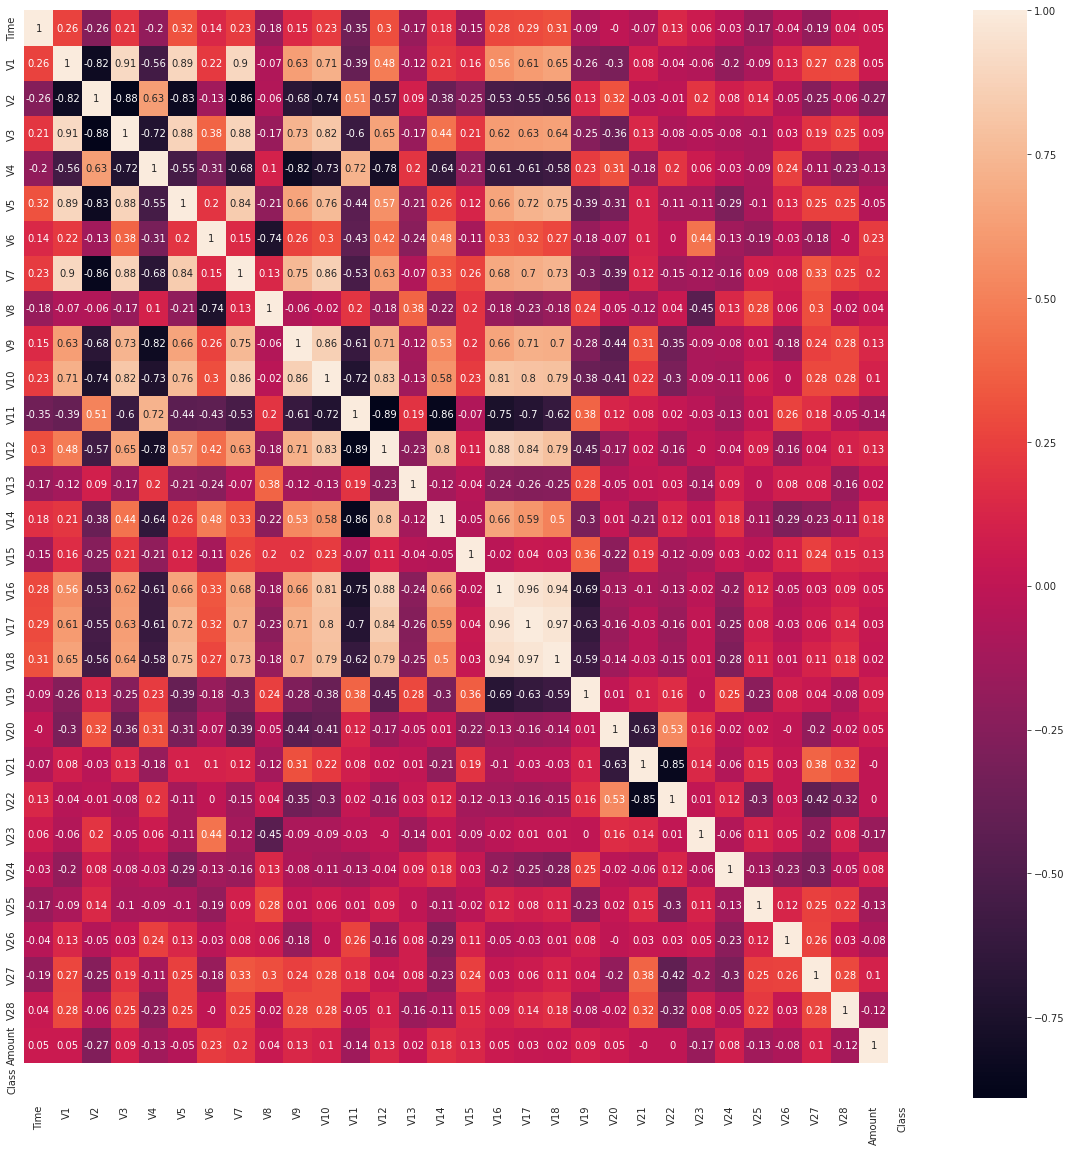

In [31]:
plt.figure(figsize=(20,20)) 
sns.heatmap(df[df[TARGET] == 1].corr().round(2), annot=True)

<AxesSubplot:>

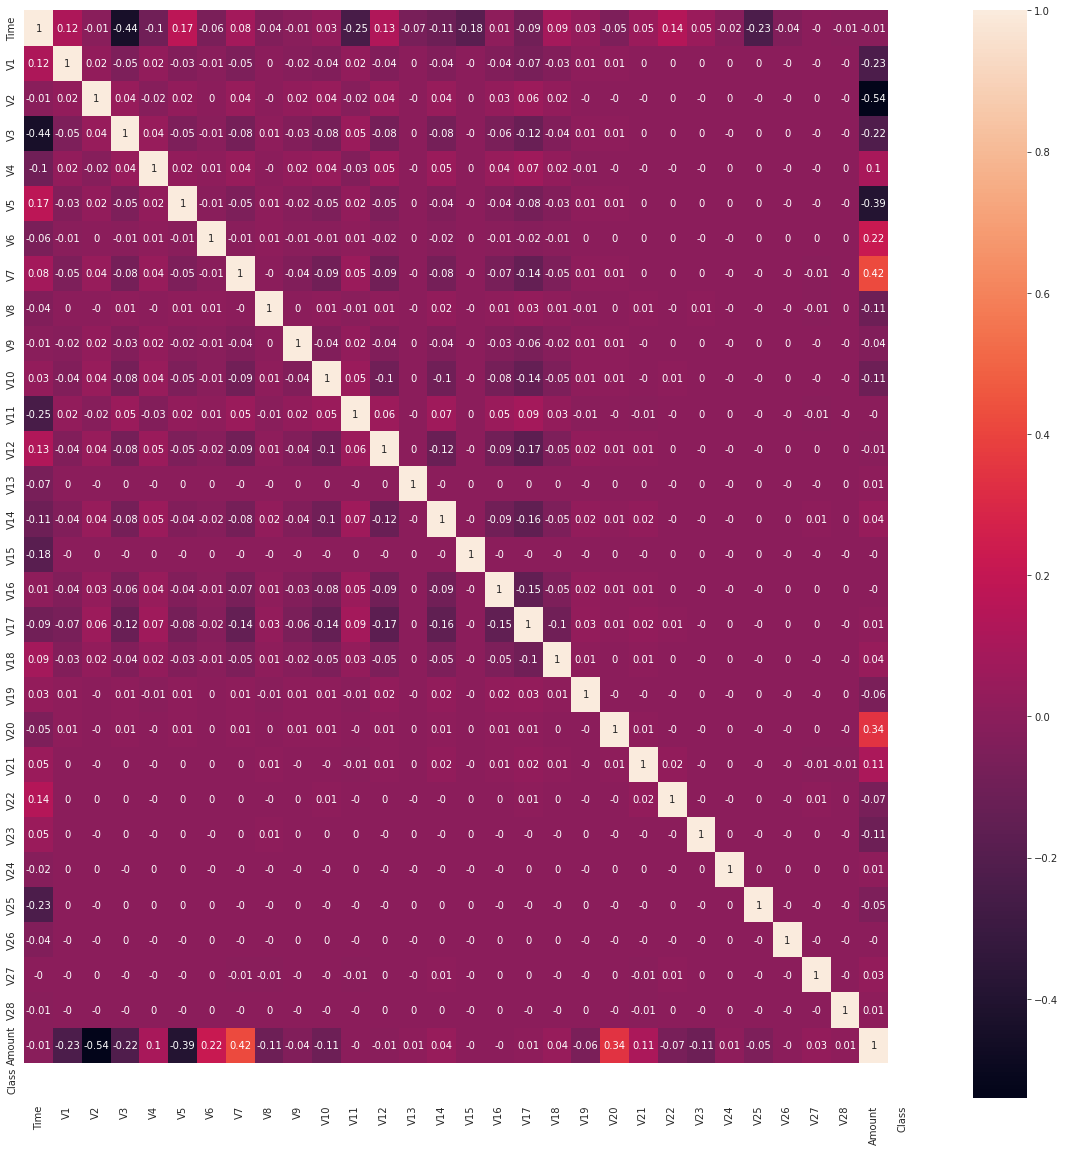

In [32]:
plt.figure(figsize=(20,20))
sns.heatmap(df[df[TARGET] == 0].corr().round(2), annot=True)

In [33]:
def print_corr_list(data, target, prec=0.5):
    print(f'Label:{target}')
    corr_dict = {}
    for i in data.drop(columns = target).corr() :
        c = data[target].corr(data[i])
        if c >= prec:
            corr_dict[i] = c
    item_len = len(corr_dict)
    if item_len:
        corr_dict = dict(sorted(corr_dict.items(), key=lambda item: item[1], reverse=True))
        df=pd.DataFrame.from_dict(corr_dict, orient='index', columns=['Corr'])
        print(df)
        print(f'({item_len})', 'variables' if item_len>1 else 'variable', 'listed.')
    else:
        print('No item found correlated.')
        
    print(f"Correlation threshold: {prec}")
    
print_corr_list(df[df[TARGET] == 1], TARGET)

Label:Class
No item found correlated.
Correlation threshold: 0.5


In [34]:
def numerical_cols(data):
    return data.select_dtypes(['number'])
    #df.select_dtypes(include=np.number)
    
def overall_corr(data, col_target, prec=0.8):
    other_cols = numerical_cols(data).drop(columns = col_target).columns  #other than target
    hi_corr = {}
    cols = other_cols.copy()        
    for col1 in other_cols:
        cols = cols[1:]         #remove the first item
        for col2 in cols:
#             print(col1, col2)
            corr = data[col1].corr(data[col2])
            if corr >= prec:
                hi_corr[col1 + ' _ ' + col2] = corr
    if len(hi_corr):
        hi_corr = dict(sorted(hi_corr.items(), key=lambda item: item[1], reverse=True))
        print(pd.DataFrame.from_dict(hi_corr, orient='index', columns=['Corr']))
    else:
        print('No correlation between features. \nThreshold:', prec)
        
overall_corr(df[df[TARGET]==1], TARGET)  

           Corr
V17 _ V18  0.97
V16 _ V17  0.96
V16 _ V18  0.94
V1 _ V3    0.91
V1 _ V7    0.90
V1 _ V5    0.89
V3 _ V5    0.88
V3 _ V7    0.88
V12 _ V16  0.88
V9 _ V10   0.86
V7 _ V10   0.86
V12 _ V17  0.84
V5 _ V7    0.84
V10 _ V12  0.83
V3 _ V10   0.82
V10 _ V16  0.81
V10 _ V17  0.80


In [35]:
df_bkp = df.copy()    # save unprocessed data to reuse

In [36]:
# df.drop('Time', axis=1, inplace=True)

# Model Building

## Preprocess Data

In [37]:
X = df.drop([TARGET], axis=1)
y = df[TARGET]

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

### Scale Data

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1,1))

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import cohen_kappa_score

def eval_metrics(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))
    print("Mathew's Corr Coefficient: ", matthews_corrcoef(y_test, y_pred))
    print("Cohen-Kappa Score:         ", cohen_kappa_score(y_test, y_pred))
    
    

## Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression

# model = LogisticRegression(class_weight='balanced', random_state=42)
# model.fit(X_train, y_train)

In [42]:
from sklearn.pipeline import Pipeline

operations = [("scaler", StandardScaler()), ('log', LogisticRegression())]

pipe_model = Pipeline(steps=operations)
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('log', LogisticRegression())])

In [43]:
eval_metrics(pipe_model,X_train, y_train, X_test, y_test)

Test_Set
[[56851    13]
 [   34    64]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.65      0.73        98

    accuracy                           1.00     56962
   macro avg       0.92      0.83      0.87     56962
weighted avg       1.00      1.00      1.00     56962


Train_Set
[[227419     32]
 [   142    252]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.89      0.64      0.74       394

    accuracy                           1.00    227845
   macro avg       0.94      0.82      0.87    227845
weighted avg       1.00      1.00      1.00    227845

Mathew's Corr Coefficient:  0.7363585541572303
Cohen-Kappa Score:          0.7310213399471811


### Cross-validate Logistic Regression

In [44]:
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate

In [45]:
scoring = {"f1_Fraud" : make_scorer(f1_score, pos_label=1),
           "precision_Fraud" : make_scorer(precision_score,  pos_label=1),
           "recall_Fraud" : make_scorer(recall_score,  pos_label=1)}

# scoring = ['precision','recall','f1','accuracy']

operations = [('scaler',StandardScaler()),('log',LogisticRegression())]
model = Pipeline(operations)

scores = cross_validate(model, X_train, y_train, scoring=scoring, cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_f1_Fraud          0.73
test_precision_Fraud   0.88
test_recall_Fraud      0.63
dtype: float64

## Class weights

In [46]:
# from sklearn.utils import class_weight
# class_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
# pd.Series(class_weights).unique()

#Output:
# array([  0.50086612, 289.14340102])

In [47]:
class_weights = {0:1, 1:15}

operations = [("scaler", StandardScaler()), ('log', LogisticRegression(class_weight=class_weights))]
pipe_model_weight = Pipeline(steps=operations)
pipe_model_weight.fit(X_train, y_train)
eval_metrics(pipe_model_weight, X_train, y_train, X_test, y_test)

Test_Set
[[56817    47]
 [   15    83]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.64      0.85      0.73        98

    accuracy                           1.00     56962
   macro avg       0.82      0.92      0.86     56962
weighted avg       1.00      1.00      1.00     56962


Train_Set
[[227321    130]
 [    69    325]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.71      0.82      0.77       394

    accuracy                           1.00    227845
   macro avg       0.86      0.91      0.88    227845
weighted avg       1.00      1.00      1.00    227845

Mathew's Corr Coefficient:  0.7348379443353067
Cohen-Kappa Score:          0.7275356245278455


### Cross-validate with class weights

In [ ]:
operations = [('scaler',StandardScaler()),('log',LogisticRegression(class_weight=class_weights))]
model = Pipeline(operations)

scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

## Precision - Recall Curve

In [ ]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve, average_precision_score
plot_precision_recall_curve(pipe_model_weight, X_test, y_test);

In [ ]:
y_pred_proba = pipe_model.predict_proba(X_train)
average_precision_score(y_train, y_pred_proba[:,1])

In [ ]:
def calc_opt_threshold(model, X_train, y_train):
    y_pred_proba = model.predict_proba(X_train)
    print('ROC/AUC score: ', roc_auc_score(y_train, y_pred_proba[:,1]))
    
#     false_pos_rate, true_pos_rate, thresholds = roc_curve(y_train, y_pred_proba[:,1])
#     optimal_idx = np.argmax(true_pos_rate - false_pos_rate)
    
   
    precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_proba[:,1])
    optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
    
    optimal_threshold = thresholds[optimal_idx]
    return optimal_threshold

calc_opt_threshold(pipe_model, X_train, y_train)

## Stratified K-fold Validation

If you are going to use the cross validation method to be more sure of the performance of your model for unbalanced data, you should make sure that the class distributions in the iterations are equal. For this case, you should use [StratifiedKFold](https://www.analyseup.com/python-machine-learning/stratified-kfold.html) instead of regular cross validation method.

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html

In [ ]:
from sklearn.model_selection import StratifiedKFold    # Modeli kaç parçaya ayırmak istiyorsak ona göre index numaraları belirler.

def CV_Stratified(n, model, X, y, optimal_threshold, random_state=42):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = random_state)
    acc_scores = []
    pre_scores = []
    rec_scores = []
    f1_scores  = []
    
    X = X.reset_index(drop=True)       # Index no'ları her işlemden sonra sıfırlaması için.
    y = y.reset_index(drop=True)
    
    for train_index, test_index in skf.split(X, y):
        
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        y_pred_proba = model.predict_proba(X_test)
             
        y_pred2 = pd.Series(y_pred_proba[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
        
        acc_scores.append(accuracy_score(y_test, y_pred2))
        pre_scores.append(precision_score(y_test, y_pred2, pos_label=1))
        rec_scores.append(recall_score(y_test, y_pred2, pos_label=1))
        f1_scores.append(f1_score(y_test, y_pred2, pos_label=1))
    
    print(f'Accuracy {np.mean(acc_scores)*100:>10,.2f}%  std {np.std(acc_scores)*100:.2f}%')
    print(f'Precision-1 {np.mean(pre_scores)*100:>7,.2f}%  std {np.std(pre_scores)*100:.2f}%')
    print(f'Recall-1 {np.mean(rec_scores)*100:>10,.2f}%  std {np.std(rec_scores)*100:.2f}%')
    print(f'F1_score-1 {np.mean(f1_scores)*100:>8,.2f}%  std {np.std(f1_scores)*100:.2f}%')
    print(f'Threshold: {optimal_threshold:>10,.5f}')
    

CV_Stratified(10, pipe_model_weight, pd.DataFrame(X_train), y_train, 0.5)

In [ ]:
optimal_threshold = calc_opt_threshold(pipe_model, X_train, y_train)
CV_Stratified(10, pipe_model_weight, pd.DataFrame(X_train), y_train, optimal_threshold)

## Resampling

### SMOTE (Synthetic Minority Oversampling Technique)

In [ ]:
df[TARGET].value_counts()

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline

In [ ]:
over = SMOTE(sampling_strategy={1: 1000}) 
under = RandomUnderSampler(sampling_strategy={0: 30000}) 

weights = {0:1, 1:1}
steps = [('over', over), ('under', under), 
              ("log", LogisticRegression(class_weight=weights, random_state=42))]

pipeline = imbpipeline(steps=steps)
pipeline.fit(X_train, y_train)

eval_metrics(pipeline, X_train, y_train, X_test, y_test)

### Cross-validate Resampling

In [ ]:
steps = [('over', over), ('under', under), 
              ("log", LogisticRegression(class_weight=weights, random_state=42))]

model = imbpipeline(steps=steps)

CV = 10
scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'recall', 'f1'], cv = CV)
df_scores = pd.DataFrame(scores, index = range(1, CV+1))
df_scores.mean()[2:]

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= [0,1],
    cmap="Set1",
    )
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [ ]:
scoring = {"f1_Fraud" : make_scorer(f1_score, pos_label=1),
           "precision_Fraud" : make_scorer(precision_score,  pos_label=1),
           "recall_Fraud" : make_scorer(recall_score,  pos_label=1)}

steps = [('over', over), ('under', under), 
              ("log", LogisticRegression(class_weight=weights, random_state=42))]

model = imbpipeline(steps=steps)
CV = 10
scores = cross_validate(model, X_train, y_train, scoring = scoring, cv = CV)
df_scores = pd.DataFrame(scores, index = range(1, CV+1))
df_scores.mean()[2:]

In [ ]:
from yellowbrick.classifier import PrecisionRecallCurve

viz = PrecisionRecallCurve(
    model,
    per_class=True, classes= [0,1],
    cmap="Set1",
    )
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

In [ ]:
opt_thr = calc_opt_threshold(model, X_train, y_train)
opt_thr

In [ ]:
CV_Stratified(10, model, X_train, y_train, optimal_threshold=0.5)

In [ ]:
CV_Stratified(10, model, X_train, y_train, opt_thr)

# Random Forest with SMOTE

In [ ]:
from sklearn.ensemble import RandomForestClassifier

class_weights = {0: 1, 1: 1}

over = SMOTE(sampling_strategy={1: 1000})
under = RandomUnderSampler(sampling_strategy={0: 20000})

operations = [('o', over), ('u', under), ('rf', RandomForestClassifier(class_weight=class_weights, max_depth=7, random_state=42))]
rf_model = imbpipeline(steps=operations)
rf_model.fit(X_train, y_train)

eval_metrics(rf_model, X_train, y_train, X_test, y_test)

## Cross-validate Random Forest

In [65]:
weights = {0: 1, 1: 1}
model = RandomForestClassifier(class_weight = weights, max_depth=7, random_state=42)
CV = 10
scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision', 'recall', 'f1'], cv = CV)
df_scores = pd.DataFrame(scores, index = range(1, CV+1))
df_scores.mean()[2:]

test_accuracy    1.00
test_precision   0.94
test_recall      0.74
test_f1          0.83
dtype: float64

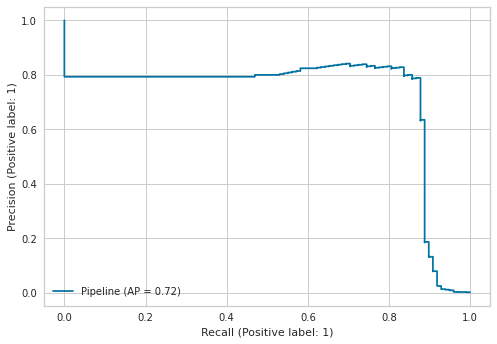

In [66]:
plot_precision_recall_curve(rf_model, X_test, y_test);

In [67]:
opt_thr = calc_opt_threshold(rf_model, X_train, y_train)
opt_thr

ROC/AUC score:  0.9873035854635015


0.7915605686673358

In [68]:
CV_Stratified(10, rf_model, X_train, y_train, opt_thr)

Accuracy      99.94%  std 0.01%
Precision-1   88.36%  std 4.48%
Recall-1      78.47%  std 4.80%
F1_score-1    82.93%  std 2.24%
Threshold:    0.79156


# SHAP (SHapley Additive exPlanations)

In [69]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


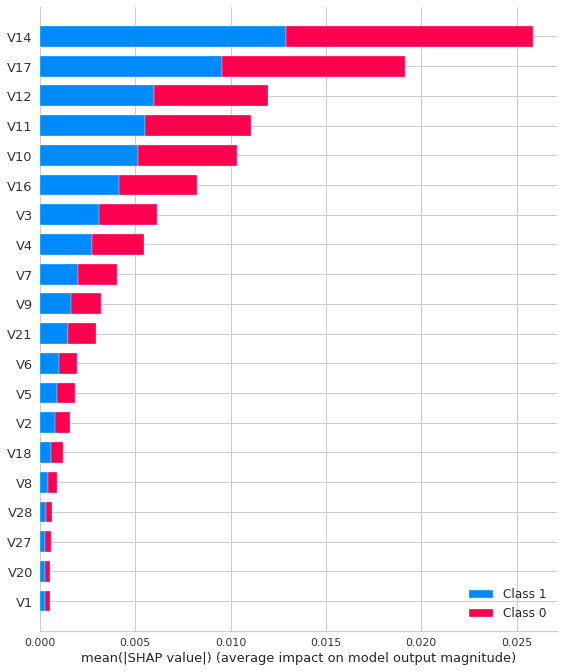

In [70]:
import shap
explainer = shap.TreeExplainer(rf_model["rf"])
shap_values = explainer.shap_values(X_test,approximate=True)
shap.summary_plot(shap_values, X_test, plot_type="bar")

In [71]:
features = ['V14', 'V17', 'V12', 'V10', 'V11']
X = df[features]
y = df[TARGET]

In [72]:
X.shape

(284807, 5)

In [73]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(X, y, test_size=0.1, random_state=42, stratify =y)

In [74]:
class_weights = {0:1, 1:12}
operations = [("scaler", StandardScaler()), ('log', LogisticRegression(class_weight=class_weights))]
shap_log_model = Pipeline(steps=operations)
shap_log_model.fit(X_train_, y_train_)
eval_metrics(shap_log_model, X_train_, y_train_, X_test_, y_test_)

Test_Set
[[28416    16]
 [    8    41]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.72      0.84      0.77        49

    accuracy                           1.00     28481
   macro avg       0.86      0.92      0.89     28481
weighted avg       1.00      1.00      1.00     28481


Train_Set
[[255785     98]
 [    84    359]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    255883
           1       0.79      0.81      0.80       443

    accuracy                           1.00    256326
   macro avg       0.89      0.91      0.90    256326
weighted avg       1.00      1.00      1.00    256326

Mathew's Corr Coefficient:  0.7753848544318918
Cohen-Kappa Score:          0.7731651954602774


In [75]:
shap_rf_model = RandomForestClassifier(max_depth=7, random_state=42)
shap_rf_model.fit(X_train_, y_train_)
eval_metrics(shap_rf_model, X_train_, y_train_, X_test_, y_test_)

Test_Set
[[28425     7]
 [   13    36]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.84      0.73      0.78        49

    accuracy                           1.00     28481
   macro avg       0.92      0.87      0.89     28481
weighted avg       1.00      1.00      1.00     28481


Train_Set
[[255840     43]
 [    93    350]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    255883
           1       0.89      0.79      0.84       443

    accuracy                           1.00    256326
   macro avg       0.95      0.89      0.92    256326
weighted avg       1.00      1.00      1.00    256326

Mathew's Corr Coefficient:  0.783932831871621
Cohen-Kappa Score:          0.7822585145934424


## SHAP with Class Weights

In [76]:
weights = {0:1, 1:12}
shap_rf_model_weighted = RandomForestClassifier(class_weight=weights, max_depth=7, random_state=42)
shap_rf_model_weighted.fit(X_train_, y_train_)
eval_metrics(shap_rf_model_weighted, X_train_, y_train_, X_test_, y_test_)

Test_Set
[[28416    16]
 [    7    42]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.72      0.86      0.79        49

    accuracy                           1.00     28481
   macro avg       0.86      0.93      0.89     28481
weighted avg       1.00      1.00      1.00     28481


Train_Set
[[255800     83]
 [    69    374]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    255883
           1       0.82      0.84      0.83       443

    accuracy                           1.00    256326
   macro avg       0.91      0.92      0.92    256326
weighted avg       1.00      1.00      1.00    256326

Mathew's Corr Coefficient:  0.7874459925913118
Cohen-Kappa Score:          0.7846450585068034


# Deep Learning

In [77]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

In [78]:
features = ['V14', 'V17', 'V12', 'V10', 'V11']
X = df[features]
y = df[TARGET]

SEED = 42
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.2,
                                                    random_state=SEED)

In [79]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [80]:
tf.random.set_seed(SEED)

model_ann = Sequential()

model_ann.add(Dense(30, activation = "relu", input_dim = X_train.shape[1]))
model_ann.add(Dense(15, activation = "relu"))
model_ann.add(Dense(1, activation = "sigmoid"))

model_ann.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=5, restore_best_weights = True)


model_ann.fit(x = X_train, y = y_train, validation_split = 0.1, 
              batch_size = 32, epochs = 200, 
              callbacks=[early_stop], verbose=1)

2022-11-08 18:36:30.183709: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-08 18:36:30.184718: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-08 18:36:30.185876: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-08 18:36:30.186631: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-08 18:36:30.187415: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from S

Epoch 1/200
6409/6409 [==============================] - 20s 3ms/step - loss: 0.0097 - accuracy: 0.9992 - val_loss: 0.0029 - val_accuracy: 0.9996
Epoch 2/200
6409/6409 [==============================] - 16s 2ms/step - loss: 0.0037 - accuracy: 0.9994 - val_loss: 0.0036 - val_accuracy: 0.9995
Epoch 3/200
6409/6409 [==============================] - 17s 3ms/step - loss: 0.0036 - accuracy: 0.9994 - val_loss: 0.0033 - val_accuracy: 0.9993
Epoch 4/200
6409/6409 [==============================] - 16s 2ms/step - loss: 0.0035 - accuracy: 0.9994 - val_loss: 0.0025 - val_accuracy: 0.9996
Epoch 5/200
6409/6409 [==============================] - 17s 3ms/step - loss: 0.0035 - accuracy: 0.9994 - val_loss: 0.0025 - val_accuracy: 0.9996
Epoch 6/200
6409/6409 [==============================] - 16s 2ms/step - loss: 0.0034 - accuracy: 0.9994 - val_loss: 0.0031 - val_accuracy: 0.9995
Epoch 7/200
6409/6409 [==============================] - 17s 3ms/step - loss: 0.0034 - accuracy: 0.9994 - val_loss: 0.0028 -

In [81]:
model_ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 30)                180       
_________________________________________________________________
dense_1 (Dense)              (None, 15)                465       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 16        
Total params: 661
Trainable params: 661
Non-trainable params: 0
_________________________________________________________________


In [82]:
loss_df = pd.DataFrame(model_ann.history.history)
loss_df.head()

,loss,accuracy,val_loss,val_accuracy
0,0.01,1.00,0.00,1.00
1,0.00,1.00,0.00,1.00
2,0.00,1.00,0.00,1.00
3,0.00,1.00,0.00,1.00
4,0.00,1.00,0.00,1.00


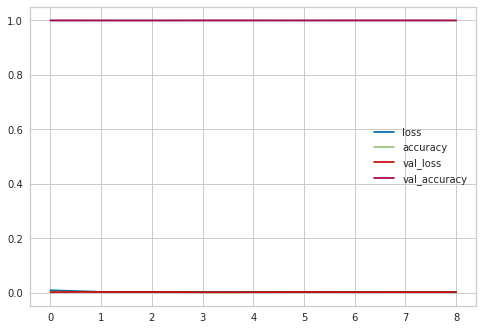

In [83]:
loss_df.plot();

In [84]:
loss, accuracy = model_ann.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("accuracy : ", accuracy)

loss :  0.0033868805039674044
accuracy :  0.9993329048156738


In [85]:
#0.1 test size
y_pred = (model_ann.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[56844    20]
 [   18    80]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.80      0.82      0.81        98

    accuracy                           1.00     56962
   macro avg       0.90      0.91      0.90     56962
weighted avg       1.00      1.00      1.00     56962



# Save Final Model

In [86]:
# Saving the model for Future Inferences

model_json = model_ann.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
    

model_ann.save("model.h5")

In [87]:
columns = X.columns
columns

Index(['V14', 'V17', 'V12', 'V10', 'V11'], dtype='object')

In [88]:
import joblib

joblib.dump(scaler, open('scaler', 'wb'))
joblib.dump(columns, open('columns.pkl', 'wb'))

# Load Model and Predict

In [89]:
from keras.models import load_model
path = '/kaggle/working/model.h5'
model = load_model(path)
scaler = joblib.load('scaler')
columns = joblib.load('columns.pkl')

In [90]:
columns

Index(['V14', 'V17', 'V12', 'V10', 'V11'], dtype='object')

In [91]:
X.loc[1463], y[1463]

(V14   -0.00
 V17    0.10
 V12    0.25
 V10    1.07
 V11    1.02
 Name: 1463, dtype: float64,
 0)

In [92]:
model.predict(X.loc[[1463]])

array([[0.00021477]], dtype=float32)